In [1]:
# examples and exercises in chapter 2.3 of the Chinese version of book "Joyful Pandas" (pandas数据处理与分析)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir("../../")

In [4]:
df = pd.read_csv("data/learn_pandas.csv")
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer',
       'Test_Number', 'Test_Date', 'Time_Record'],
      dtype='object')

In [6]:
df = df[df.columns[:7]]
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer'], dtype='object')

In [3]:
# 2.3.1

In [7]:
df.head(2)

,School,Grade,Name,Gender,Height,Weight,Transfer
0,A,Freshman,Gaopeng Yang,Female,158.9,46.0,N
1,B,Freshman,Changqiang You,Male,166.5,70.0,N


In [8]:
df.tail(3)

,School,Grade,Name,Gender,Height,Weight,Transfer
197,A,Senior,Chengqiang Chu,Female,153.9,45.0,N
198,A,Senior,Chengmei Shen,Male,175.3,71.0,N
199,D,Sophomore,Chunpeng Lv,Male,155.7,51.0,N


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   School    200 non-null    object 
 1   Grade     200 non-null    object 
 2   Name      200 non-null    object 
 3   Gender    200 non-null    object 
 4   Height    183 non-null    float64
 5   Weight    189 non-null    float64
 6   Transfer  188 non-null    object 
dtypes: float64(2), object(5)
memory usage: 11.1+ KB


In [10]:
df.describe()

,Height,Weight
count,183.000000,189.000000
mean,163.218033,55.015873
std,8.608879,12.824294
min,145.400000,34.000000
25%,157.150000,46.000000
50%,161.900000,51.000000
75%,167.500000,65.000000
max,193.900000,89.000000


In [11]:
# 2.3.2

In [13]:
df_demo = df[["Height", "Weight"]]
df_demo.mean()

Height    163.218033
Weight     55.015873
dtype: float64

In [14]:
df_demo.max()

Height    193.9
Weight     89.0
dtype: float64

In [15]:
df_demo.quantile(0.75)

Height    167.5
Weight     65.0
Name: 0.75, dtype: float64

In [16]:
df_demo.idxmax()

Height    193
Weight      2
dtype: int64

In [17]:
df_demo.idxmin()

Height    143
Weight     49
dtype: int64

In [20]:
df_demo.mean(axis=1).head()

0    102.45
1    118.25
2    138.95
3     41.00
4    124.00
dtype: float64

In [22]:
# Ex2-5

In [28]:
df_demo = df[["Height", "Weight", "Name"]].copy()
df_demo["BMI"] = df_demo["Weight"] / (df_demo["Height"] / 100)
df_demo.iloc[df_demo["BMI"].idxmax()]["Name"]

'Qiang Zheng'

In [29]:
# 2.3.3

In [30]:
df["School"].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [31]:
df["School"].nunique()

4

In [41]:
df["School"].value_counts()

School
D    69
A    57
C    40
B    34
Name: count, dtype: int64

<Axes: xlabel='School'>

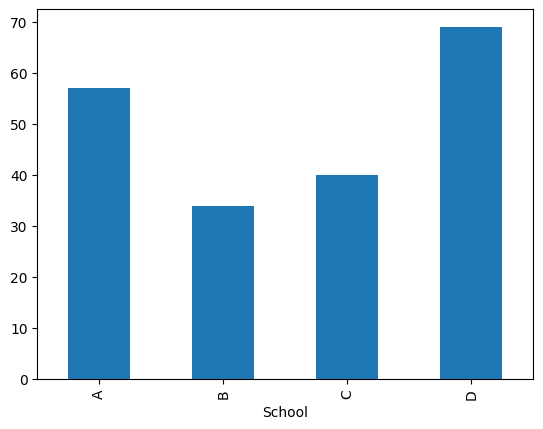

In [39]:
df["School"].value_counts().sort_index().plot.bar()

In [40]:
df["School"].value_counts(normalize=True)

School
D    0.345
A    0.285
C    0.200
B    0.170
Name: proportion, dtype: float64

In [44]:
df_demo = df[["Gender", "Transfer", "Name"]]

In [45]:
df_demo.drop_duplicates(["Gender", "Transfer"], keep="first")

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
12,Female,NaN,Peng You
21,Male,NaN,Xiaopeng Shen
36,Male,Y,Xiaojuan Qin
43,Female,Y,Gaoli Feng


In [44]:
df_demo.drop_duplicates(["Gender", "Transfer"], keep="last")

,Gender,Transfer,Name
147,Male,NaN,Juan You
150,Male,Y,Chengpeng You
169,Female,Y,Chengquan Qin
194,Female,NaN,Yanmei Qian
197,Female,N,Chengqiang Chu
199,Male,N,Chunpeng Lv


In [46]:
df_demo.drop_duplicates(["Name", "Transfer"], keep=False).head()

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
4,Male,N,Gaojuan You
5,Female,N,Xiaoli Qian
7,Female,N,Gaoqiang Qian


In [47]:
df["School"].drop_duplicates()

0    A
1    B
3    C
5    D
Name: School, dtype: object

In [48]:
df_demo.duplicated(["Gender", "Transfer"]).head()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [52]:
df_demo[["Gender", "Transfer"]].duplicated().head()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [49]:
df["School"].duplicated().head()

0    False
1    False
2     True
3    False
4     True
Name: School, dtype: bool

In [53]:
# 2.3.4

In [57]:
df["Gender"].replace({"Female": 0, "Male": 1}).head()

/var/folders/1b/xnyhhbh578x5vpfmbtn082pm0000gn/T/ipykernel_919/3696300312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace({"Female": 0, "Male": 1}).head()


0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [58]:
df["Gender"].replace(["Female", "Male"], [0, 1]).head()

/var/folders/1b/xnyhhbh578x5vpfmbtn082pm0000gn/T/ipykernel_919/2439069045.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace(["Female", "Male"], [0, 1]).head()


0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [59]:
s = pd.Series(["a", 1, "b", 2, 1, 1, "a"])

In [59]:
s.replace([1, 2], method="ffill")

/var/folders/1b/xnyhhbh578x5vpfmbtn082pm0000gn/T/ipykernel_919/1105428654.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  s.replace([1, 2], method="ffill")


0    a
1    a
2    b
3    b
4    b
5    b
6    a
dtype: object

In [60]:
s.replace([1, 2], method="bfill")

/var/folders/1b/xnyhhbh578x5vpfmbtn082pm0000gn/T/ipykernel_919/1617896601.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  s.replace([1, 2], method="bfill")


0    a
1    b
2    b
3    a
4    a
5    a
6    a
dtype: object

In [61]:
s = pd.Series([-1, 1.2345, 100, -50])

In [61]:
s.where(s<0)

0    -1.0
1     NaN
2     NaN
3   -50.0
dtype: float64

In [62]:
s.where(s<0, 100)

0     -1.0
1    100.0
2    100.0
3    -50.0
dtype: float64

In [63]:
s.mask(s<0)

0         NaN
1      1.2345
2    100.0000
3         NaN
dtype: float64

In [64]:
s.mask(s<0, -50)

0    -50.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

In [65]:
s_condition = pd.Series([True, False, False, True], index=s.index)
s.mask(s_condition, -50)

0    -50.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

In [67]:
s_condition = s.isin([-1, 100])
s.mask(s_condition, -500)

0   -500.0000
1      1.2345
2   -500.0000
3    -50.0000
dtype: float64

In [72]:
s = pd.Series([-1, 1.2345, 100, -50])
s.round(2)

0     -1.00
1      1.23
2    100.00
3    -50.00
dtype: float64

In [73]:
s.abs()

0      1.0000
1      1.2345
2    100.0000
3     50.0000
dtype: float64

In [75]:
s.clip(0, 2)

0    0.0000
1    1.2345
2    2.0000
3    0.0000
dtype: float64

In [69]:
# Ex2-6

In [76]:
clip_max = 5000
clip_min = -5000

s.mask(s<0, clip_min).mask(s>2, clip_max)

0   -5000.0000
1       1.2345
2    5000.0000
3   -5000.0000
dtype: float64

In [70]:
# 2.3.5

In [77]:
df_demo = df[["Grade", "Name", "Height", "Weight"]].set_index(["Grade", "Name"])

In [78]:
df_demo.sort_values("Height").head()

,,Height,Weight
Grade,Name,,
Junior,Xiaoli Chu,145.4,34.0
Senior,Gaomei Lv,147.3,34.0
Sophomore,Peng Han,147.8,34.0
Senior,Changli Lv,148.7,41.0
Sophomore,Changjuan You,150.5,40.0


In [79]:
df_demo.sort_values("Height", ascending=False).head()

Height  Weight
Grade    Name                         
Senior   Xiaoqiang Qin   193.9    79.0
         Mei Sun         188.9    89.0
         Gaoli Zhao      186.5    83.0
Freshman Qiang Han       185.3    87.0
Senior   Qiang Zheng     183.9    87.0

In [80]:
df_demo.sort_values(["Weight", "Height"], ascending=[True, False]).head()

,,Height,Weight
Grade,Name,,
Sophomore,Peng Han,147.8,34.0
Senior,Gaomei Lv,147.3,34.0
Junior,Xiaoli Chu,145.4,34.0
Sophomore,Qiang Zhou,150.5,36.0
Freshman,Yanqiang Xu,152.4,38.0


In [83]:
df_demo.sort_index(level=["Grade", "Name"], ascending=[True, False]).head()

Height  Weight
Grade    Name                         
Freshman Yanquan Wang    163.5    55.0
         Yanqiang Xu     152.4    38.0
         Yanqiang Feng   162.3    51.0
         Yanpeng Lv        NaN    65.0
         Yanli Zhang     165.1    52.0

In [84]:
s = pd.Series(list("ebcad"))
s.rank(ascending=True, pct=False)

0    5.0
1    2.0
2    3.0
3    1.0
4    4.0
dtype: float64

In [85]:
s = pd.Series(list("abac"))
df_rank = pd.DataFrame()

for method in ["average", "min", "max", "first", "dense"]:
    df_rank[method] = s.rank(method=method)
df_rank

,average,min,max,first,dense
0,1.5,1.0,2.0,1.0,1.0
1,3.0,3.0,3.0,3.0,2.0
2,1.5,1.0,2.0,2.0,1.0
3,4.0,4.0,4.0,4.0,3.0


In [86]:
# 2.3.6

In [87]:
df_demo = df[["Height", "Weight"]]
def my_mean(x):
    res = x.mean()
    return res
df_demo.apply(my_mean)

Height    163.218033
Weight     55.015873
dtype: float64

In [88]:
df_demo.apply(lambda x:x.mean())

Height    163.218033
Weight     55.015873
dtype: float64

In [89]:
df_demo.apply(lambda x:x.mean(), axis=1).head()

0    102.45
1    118.25
2    138.95
3     41.00
4    124.00
dtype: float64

In [90]:
df_demo.apply(lambda x:(x-x.mean()).abs().mean())

Height     6.707229
Weight    10.391870
dtype: float64

In [96]:
%timeit -n 100 -r 7 df_demo.apply(lambda x:x.mean(), axis=1)

3.31 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
%timeit df_demo.mean(1)

172 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
